Import

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import math
import tensorflow as tf
import joblib
import pickle

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.models import load_model

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
missing_values = ['8888']

In [21]:
df = pd.read_excel('/content/drive/MyDrive/Dataset/Dataset_Curah_Hujan.xlsx', na_values = missing_values)
df

,Tanggal,RR
0,01-01-2019,NaN
1,02-01-2019,0.0
2,03-01-2019,20.5
3,04-01-2019,2.6
4,05-01-2019,0.9
...,...,...
1699,27-08-2023,0.0
1700,28-08-2023,0.0
1701,29-08-2023,0.0
1702,30-08-2023,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  1704 non-null   object 
 1   RR       1426 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [23]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')

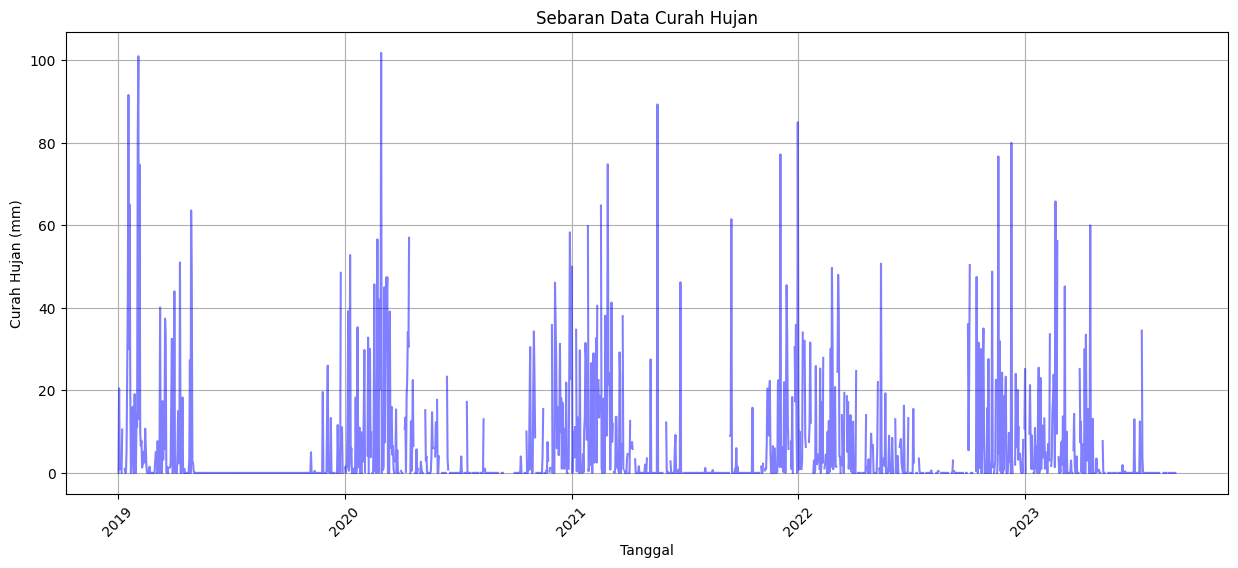

In [24]:
import matplotlib.pyplot as plt


# Plot scatter plot
plt.figure(figsize=(15, 6))
plt.plot(df['Tanggal'], df['RR'], linestyle='-', color='blue', alpha=0.5)
plt.title('Sebaran Data Curah Hujan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

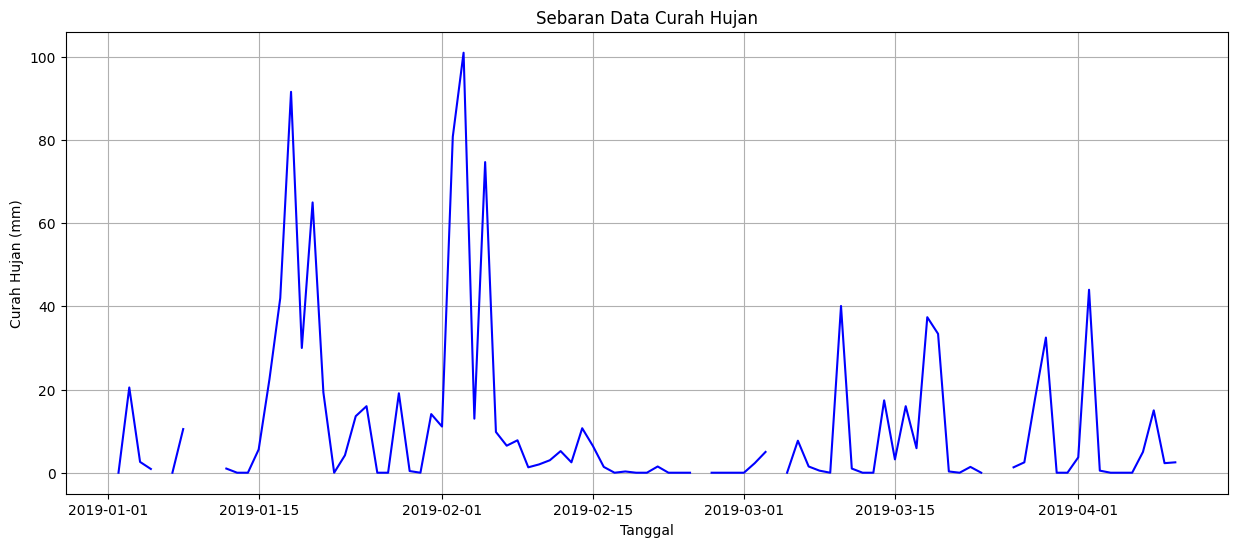

In [25]:
import matplotlib.pyplot as plt


# Plot scatter plot
plt.figure(figsize=(15, 6))
plt.plot(df['Tanggal'].head(100), df['RR'].head(100), linestyle='-', color='blue')
plt.title('Sebaran Data Curah Hujan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.grid(True)
plt.show()

In [26]:
df_1 = df.copy()
df_1

,Tanggal,RR
0,2019-01-01,NaN
1,2019-01-02,0.0
2,2019-01-03,20.5
3,2019-01-04,2.6
4,2019-01-05,0.9
...,...,...
1699,2023-08-27,0.0
1700,2023-08-28,0.0
1701,2023-08-29,0.0
1702,2023-08-30,0.0


In [27]:
df_1.isnull().sum()

Tanggal      0
RR         278
dtype: int64

In [28]:
#fitur rating yang akan diimputasi
fitur_imputasi = ['RR']
preprocessing = KNNImputer(n_neighbors=3)

#imputasi pada dataset
data_imputasi = preprocessing.fit_transform(df[fitur_imputasi])

#mengkonversi hasil imputasai menjadi data frame
data_imputasi_df = pd.DataFrame(data_imputasi, columns=fitur_imputasi)

#menggabungkan data imputasi dengan dataset asli
data_imputasi_df = df.drop(fitur_imputasi, axis=1).join(data_imputasi_df)

#menyimpan dataset yang telah diimputasi ke file csv
data_imputasi_df.to_csv('dataset_imputasi.csv', index=True)
data_imputasi_df

,Tanggal,RR
0,2019-01-01,5.923072
1,2019-01-02,0.000000
2,2019-01-03,20.500000
3,2019-01-04,2.600000
4,2019-01-05,0.900000
...,...,...
1699,2023-08-27,0.000000
1700,2023-08-28,0.000000
1701,2023-08-29,0.000000
1702,2023-08-30,0.000000


In [29]:
data_imputasi_df.isnull().sum()

Tanggal    0
RR         0
dtype: int64

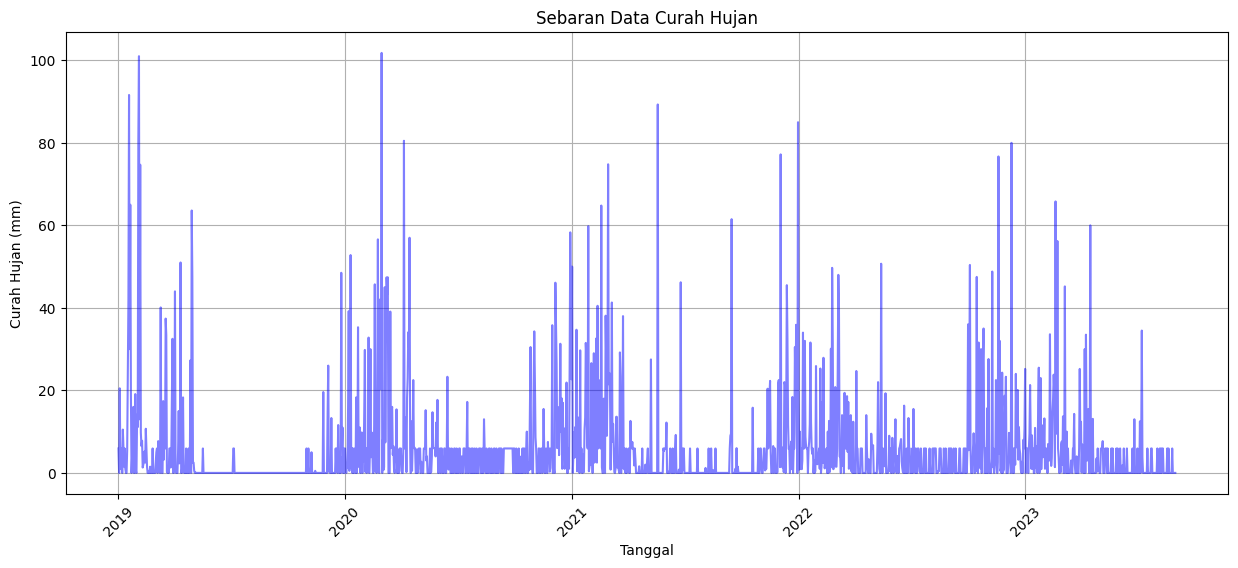

In [30]:
import matplotlib.pyplot as plt


# Plot scatter plot
plt.figure(figsize=(15, 6))
plt.plot(data_imputasi_df['Tanggal'], data_imputasi_df['RR'], linestyle='-', color='blue', alpha=0.5)
plt.title('Sebaran Data Curah Hujan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

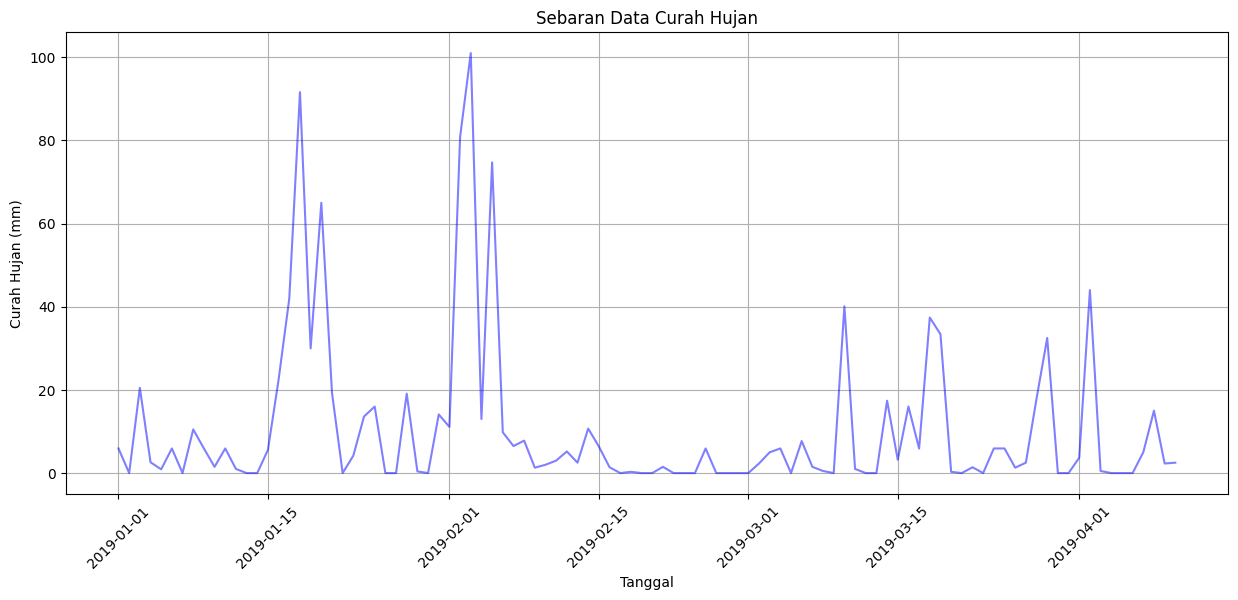

In [31]:
import matplotlib.pyplot as plt


# Plot scatter plot
plt.figure(figsize=(15, 6))
plt.plot(data_imputasi_df['Tanggal'].head(100), data_imputasi_df['RR'].head(100), linestyle='-', color='blue', alpha=0.5)
plt.title('Sebaran Data Curah Hujan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [32]:
df_2 = data_imputasi_df.copy().drop(columns=['Tanggal'])
df_2

,RR
0,5.923072
1,0.000000
2,20.500000
3,2.600000
4,0.900000
...,...
1699,0.000000
1700,0.000000
1701,0.000000
1702,0.000000


In [33]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_2)
scaled_data

array([[0.05818341],
       [0.        ],
       [0.20137525],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [34]:
normalisasi = pd.DataFrame(scaled_data)
normalisasi.to_csv('Normalisasi_data_knn.csv', index=True)

In [35]:
# Mengatur time_step
time_step = 25

# Membuat dataset x dan y
x = []
y = []
for i in range(time_step, len(scaled_data)):
    x.append(scaled_data[i - time_step:i, 0])
    y.append(scaled_data[i, 0])

x, y = np.array(x), np.array(y)

# Membagi data menjadi training dan testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Reshape x_train dan x_test agar sesuai dengan input LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Membuat DataFrame untuk menyimpan data yang telah di-split
x_train_df = pd.DataFrame(x_train.reshape(x_train.shape[0], x_train.shape[1]), columns=[f'x_train_{i}' for i in range(x_train.shape[1])])
y_train_df = pd.DataFrame(y_train, columns=['y_train'])

x_test_df = pd.DataFrame(x_test.reshape(x_test.shape[0], x_test.shape[1]), columns=[f'x_test_{i}' for i in range(x_test.shape[1])])
y_test_df = pd.DataFrame(y_test, columns=['y_test'])

# Menyimpan data ke dalam file CSV
x_train_df.to_csv('x_train.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)
x_test_df.to_csv('x_test.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

# Verifikasi penyimpanan dengan membaca kembali file CSV
x_train_loaded = pd.read_csv('x_train.csv')
y_train_loaded = pd.read_csv('y_train.csv')
x_test_loaded = pd.read_csv('x_test.csv')
y_test_loaded = pd.read_csv('y_test.csv')

print("Data training dan testing telah disimpan dan dibaca kembali:")
print("x_train_loaded.shape:", x_train_loaded.shape)
print("y_train_loaded.shape:", y_train_loaded.shape)
print("x_test_loaded.shape:", x_test_loaded.shape)
print("y_test_loaded.shape:", y_test_loaded.shape)

Data training dan testing telah disimpan dan dibaca kembali:
x_train_loaded.shape: (1175, 25)
y_train_loaded.shape: (1175, 1)
x_test_loaded.shape: (504, 25)
y_test_loaded.shape: (504, 1)


In [19]:
values = df_2.values
training_data_len = math.ceil(len(values)* 0.7)
train_data = scaled_data[0: training_data_len , :]

x_train = []
y_train = []

for i in range(25, len(train_data)):
    x_train.append(train_data[i-25:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(1168, 25, 1)
(1168,)


In [18]:
scaled_data.shape

(1704, 1)

In [36]:
test_data = scaled_data[training_data_len-25: , : ]
x_test = []
y_test = []

for i in range(25, len(test_data)):
  x_test.append(test_data[i-25:i, 0])
  y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)
print(y_test.shape)

(511, 25, 1)
(511,)


In [50]:
# Menyimpan data train dan data testing
x_train_df = pd.DataFrame({'x_train': x_train.flatten()})
x_train_df.to_csv('x_train_knn_s1.csv', index=False)
y_train_df = pd.DataFrame({'y_train': y_train.flatten()})
y_train_df.to_csv('y_train_knn_s1.csv', index=False)
x_test_df = pd.DataFrame({'x_test': x_test.flatten()})
x_test_df.to_csv('x_test_knn_s1.csv', index=False)
y_test_df = pd.DataFrame({'y_test': y_test.flatten()})
y_test_df.to_csv('y_test_knn_s1.csv', index=False)

In [36]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size= 32, epochs=12, verbose=1)

Epoch 1/12
37/37 [==============================] - 9s 37ms/step - loss: 0.0296
Epoch 2/12
37/37 [==============================] - 2s 53ms/step - loss: 0.0137
Epoch 3/12
37/37 [==============================] - 2s 65ms/step - loss: 0.0136
Epoch 4/12
37/37 [==============================] - 2s 60ms/step - loss: 0.0140
Epoch 5/12
37/37 [==============================] - 1s 38ms/step - loss: 0.0139
Epoch 6/12
37/37 [==============================] - 1s 39ms/step - loss: 0.0143
Epoch 7/12
37/37 [==============================] - 1s 37ms/step - loss: 0.0130
Epoch 8/12
37/37 [==============================] - 1s 35ms/step - loss: 0.0130
Epoch 9/12
37/37 [==============================] - 1s 39ms/step - loss: 0.0133
Epoch 10/12
37/37 [==============================] - 1s 39ms/step - loss: 0.0132
Epoch 11/12
37/37 [==============================] - 1s 36ms/step - loss: 0.0133
Epoch 12/12
37/37 [==============================] - 2s 56ms/step - loss: 0.0130


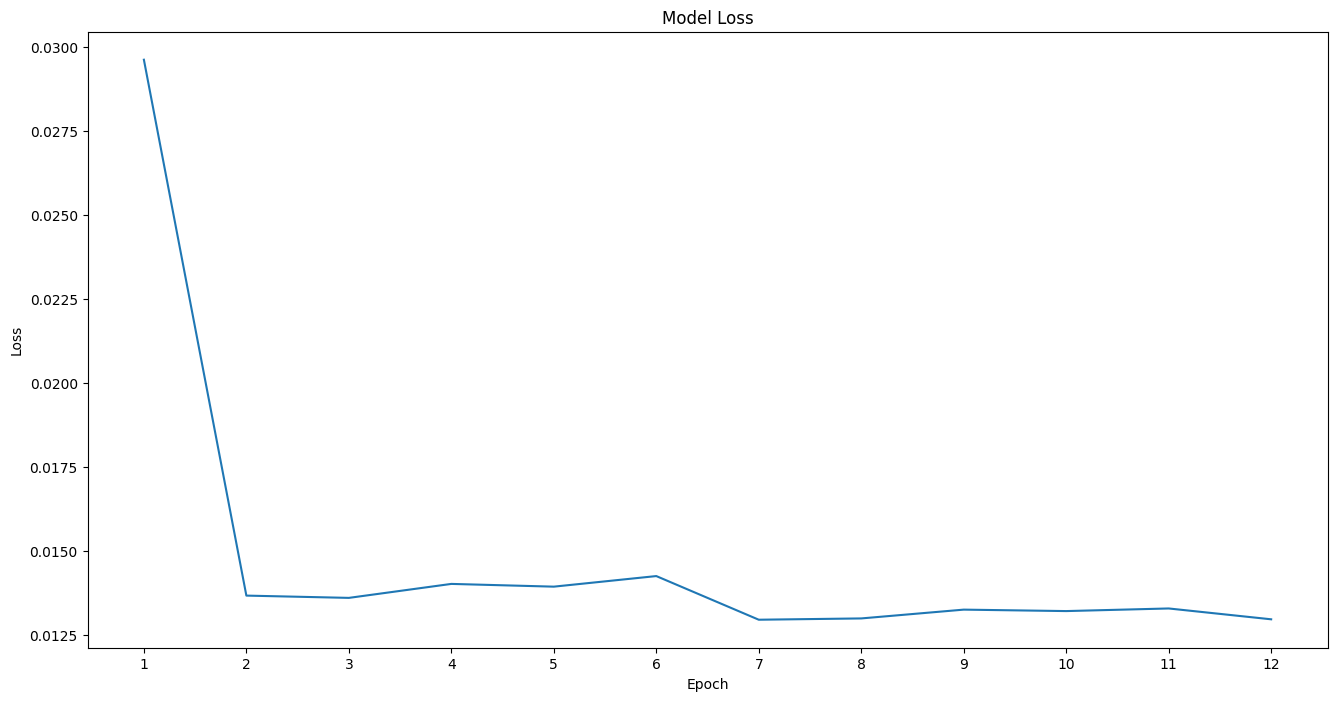

In [38]:
# Plot loss per epoch
plt.figure(figsize=(16,8))
epochs = np.arange(1, len(history.history['loss']) + 1)  # Membuat array yang berisi jumlah epoch
plt.plot(epochs, history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(epochs)  # Mengatur label sumbu x menjadi jumlah epoch
plt.show()

In [39]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

16/16 [==============================] - 1s 17ms/step


4.078359961114107

In [40]:
# Membuat DataFrame
data_df = pd.DataFrame({
    'Tanggal': df_1['Tanggal'][1200: ].values,
    'Curah_Hujan': df_2['RR'][1200: ].values,
    'Prediksi_Curah_Hujan': predictions.flatten()  # Pastikan hasil prediksi memiliki dimensi satu
})
data_df.to_csv('Perbandingan_dataset&prediksi_knn.csv', index=True)
data_df

,Tanggal,Curah_Hujan,Prediksi_Curah_Hujan
0,2022-04-15,0.0,2.377158
1,2022-04-16,0.0,3.927876
2,2022-04-17,0.0,1.563888
3,2022-04-18,0.0,4.304658
4,2022-04-19,0.0,1.790705
...,...,...,...
499,2023-08-27,0.0,7.729971
500,2023-08-28,0.0,6.401971
501,2023-08-29,0.0,3.518415
502,2023-08-30,0.0,1.586841


In [41]:
n = 1  # Example: Predict the next 10 time steps
future_predictions = []
x_last_window = x_test[-25]  # Menggunakan bagian terakhir dari data testing sebagai x_last_window
last_window = x_last_window.reshape((1, x_last_window.shape[0], x_last_window.shape[1]))

for _ in range(n):
    # Predict the next time step
    prediction = model.predict(last_window)

    # Append the prediction to the list of future predictions
    future_predictions.append(prediction[0])

    # Update the last window by removing the first element and appending the prediction
    last_window = np.append(last_window[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Convert the list of future predictions to a numpy array
future_predictions = np.array(future_predictions)
print('future_predictions : ', future_predictions)

# Inverse transform predictions to get the original scale
future_predictions_denormalisasi = scaler.inverse_transform(future_predictions)
print('future_predictions_denormalisasi : ', future_predictions_denormalisasi)

1/1 [==============================] - 0s 27ms/step
future_predictions :  [[0.03316212]]
future_predictions_denormalisasi :  [[3.3759043]]


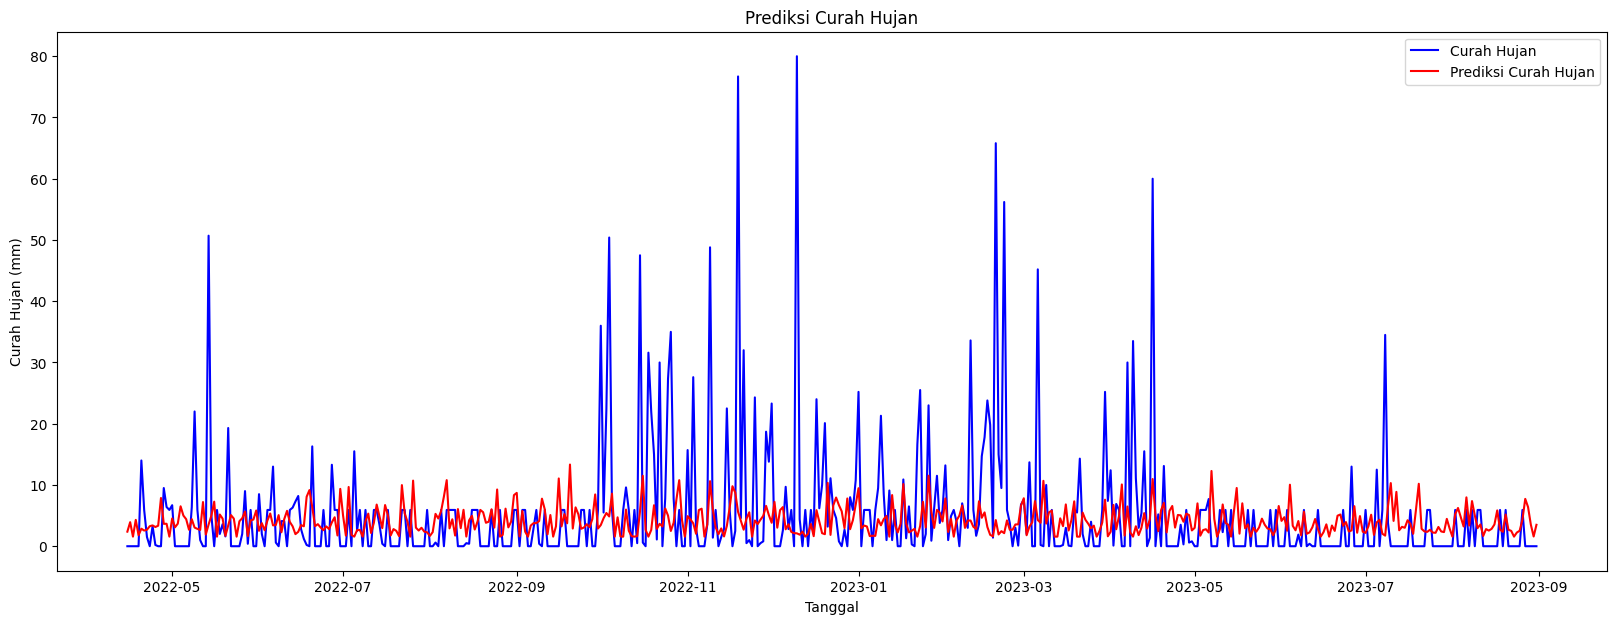

In [42]:
#Memvisualisasikan hasil prediksi
plt.figure(figsize=(20,7))
plt.plot(df_1['Tanggal'].values[1200:], values[1200:], color = 'blue', label = 'Curah Hujan')
plt.plot(df_1['Tanggal'][-predictions.shape[0]:].values, predictions, color = 'red', label = 'Prediksi Curah Hujan')
plt.title('Prediksi Curah Hujan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.legend()
plt.show()

In [43]:
# Save the model
model.save("model_lstm_knn_s1.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
